<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML12_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Convolution

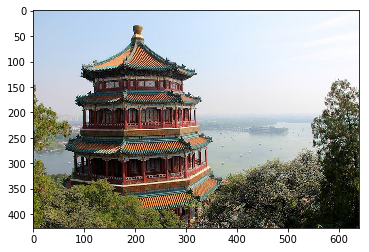

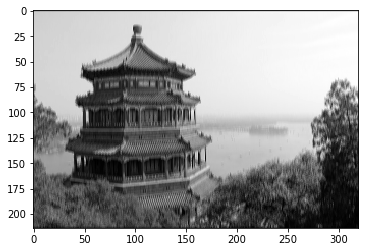

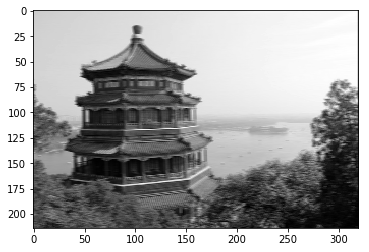

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

# Load sample images
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # verticle line
filters[3, :, :, 1] = 1 # horizontal line

# Graph 
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding='SAME')

with tf.Session() as sess:
  output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(dataset[0] / 255)
plt.show()
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.show()
plt.imshow(output[0, :, :, 1], cmap='gray')
plt.show()

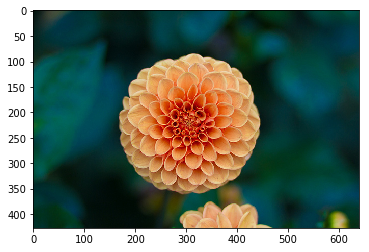

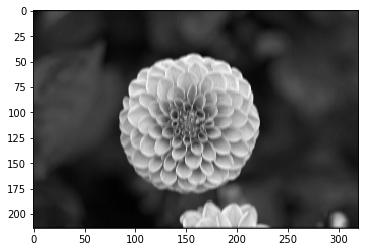

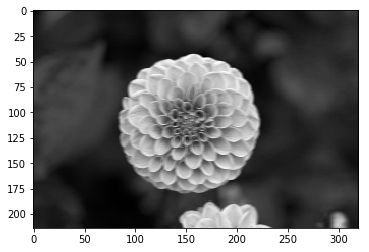

In [ ]:
plt.imshow(dataset[1] / 255)
plt.show()
plt.imshow(output[1, :, :, 0], cmap='gray')
plt.show()
plt.imshow(output[1, :, :, 1], cmap='gray')
plt.show()

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding='SAME')

W0710 08:54:22.771983 140212327987072 deprecation.py:323] From <ipython-input-12-003433c6ce92>:4: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0710 08:54:22.780447 140212327987072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


##Pooling

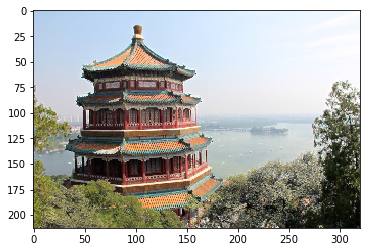

In [ ]:
# Load sample images
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # verticle line
filters[3, :, :, 1] = 1 # horizontal line

# Graph 
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.Session() as sess:
  output = sess.run(max_pool, feed_dict={X: dataset})
  
plt.imshow(output[0].astype(np.uint8))
plt.show()

##Exercises


###7

In [ ]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
tf.reset_default_graph()


X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
y = tf.placeholder(tf.int64, shape=(None))

with tf.name_scope('DNN'):
  conv1 = tf.layers.conv2d(X, 8, (5, 5), padding='SAME', activation=tf.nn.elu, 
                           kernel_initializer=tf.initializers.he_normal())
  pool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2), padding='SAME')
  
  conv2 = tf.layers.conv2d(pool1, 16, (3, 3), padding='SAME', activation=tf.nn.elu, 
                           kernel_initializer=tf.initializers.he_normal())
  pool2 = tf.layers.max_pooling2d(conv2, (3, 3), (2, 2), padding='SAME')
  
  conv3 = tf.layers.conv2d(pool2, 32, (3, 3), padding='VALID', activation=tf.nn.elu, 
                           kernel_initializer=tf.initializers.he_normal())
  pool3 = tf.layers.max_pooling2d(conv3, (3, 3), (1, 1), padding='VALID')
  
  flatten = tf.layers.flatten(pool3)
  fully_connected = tf.layers.dense(flatten, 128, activation=tf.nn.elu, 
                           kernel_initializer=tf.initializers.he_normal())
  logits = tf.layers.dense(fully_connected, 10)
  
with tf.name_scope('Loss'):
  xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
  loss = tf.reduce_mean(xentr)
  
with tf.name_scope('Train'):
  optimizer = tf.train.MomentumOptimizer(0.01, 0.95, use_nesterov=True)
  training_step = optimizer.minimize(loss)

with tf.name_scope('Score'):
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')

initializer = tf.global_variables_initializer()

In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
n_epochs = 10
batch_size = 128



with tf.Session() as sess:
  initializer.run()
  
  for epoch in range(n_epochs):
    for i in range(len(X_train) // batch_size):
      X_batch, y_batch = X_train[i * batch_size : (i + 1) * batch_size].reshape(-1, 28, 28, 1), y_train[i * batch_size : (i + 1) * batch_size]            
      sess.run(training_step, feed_dict={X: X_batch, y: y_batch})
    state = sess.run([loss, accuracy], feed_dict={X: X_test.reshape(-1, 28, 28, 1), y: y_test})
    print(epoch, 'Loss:', state[0], 'Accuracy:', state[1])
  state = sess.run([loss, accuracy], feed_dict={X: X_test.reshape(-1, 28, 28, 1), y: y_test})
  print('LOSS:', state[0], 'Accuracy:'.upper(), state[1])

0 Loss: 0.061045386 Accuracy: 0.9819
1 Loss: 0.053704094 Accuracy: 0.9833
2 Loss: 0.048793178 Accuracy: 0.9849
3 Loss: 0.039336238 Accuracy: 0.9876
4 Loss: 0.038498364 Accuracy: 0.9886
5 Loss: 0.03967149 Accuracy: 0.9892
6 Loss: 0.045150716 Accuracy: 0.9878
7 Loss: 0.04425721 Accuracy: 0.9886
8 Loss: 0.039184466 Accuracy: 0.9888
9 Loss: 0.039186206 Accuracy: 0.9895
LOSS: 0.039186206 ACCURACY: 0.9895


###8

In [ ]:
!wget https://static1.squarespace.com/static/57d2d2eb5016e1b624ddfa52/t/5b75c66440ec9a87455831fa/1534445172095/HayPigs_Harlequin_Guinea_Pig_005.jpg -O gpig.jpg

--2019-07-10 11:51:02--  https://static1.squarespace.com/static/57d2d2eb5016e1b624ddfa52/t/5b75c66440ec9a87455831fa/1534445172095/HayPigs_Harlequin_Guinea_Pig_005.jpg
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216931 (212K) [image/jpeg]
Saving to: ‘gpig.jpg’

gpig.jpg            100%[===================>] 211.85K  --.-KB/s    in 0.04s   

2019-07-10 11:51:02 (4.95 MB/s) - ‘gpig.jpg’ saved [216931/216931]



In [ ]:
!wget https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/04/931/524/iStock-Tiger-Shark.jpg -O shark.jpg

--2019-07-10 11:53:43--  https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/04/931/524/iStock-Tiger-Shark.jpg
Resolving a57.foxnews.com (a57.foxnews.com)... 23.45.132.78
Connecting to a57.foxnews.com (a57.foxnews.com)|23.45.132.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46914 (46K) [image/jpeg]
Saving to: ‘shark.jpg’

shark.jpg           100%[===================>]  45.81K  --.-KB/s    in 0.01s   

2019-07-10 11:53:43 (3.30 MB/s) - ‘shark.jpg’ saved [46914/46914]



In [ ]:
!wget https://www.earthrangers.com/content/wildwire/cute_wolverine.jpg -O wolverine.jpg

--2019-07-10 11:53:19--  https://www.earthrangers.com/content/wildwire/cute_wolverine.jpg
Resolving www.earthrangers.com (www.earthrangers.com)... 169.53.191.86, 169.53.191.68
Connecting to www.earthrangers.com (www.earthrangers.com)|169.53.191.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216444 (211K) [image/jpeg]
Saving to: ‘wolverine.jpg’

wolverine.jpg       100%[===================>] 211.37K  --.-KB/s    in 0.1s    

2019-07-10 11:53:19 (1.45 MB/s) - ‘wolverine.jpg’ saved [216444/216444]



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
images = [plt.imread('shark.jpg'), plt.imread('gpig.jpg'), plt.imread('wolverine.jpg')]

In [ ]:
import cv2

In [ ]:
prep = []
for i in range(len(images)):
  im = images[i]
  im = cv2.resize(im, (299, 299)) / 255
  prep.append(im)

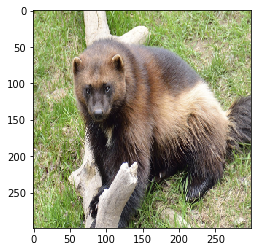

In [ ]:
plt.imshow(prep[2])

In [ ]:
import sys
import tarfile
from six.moves import urllib
import os

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [ ]:
fetch_pretrained_inception_v3()

Downloading: 100%

In [ ]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    path = os.path.join("datasets", "inception", "imagenet_class_names.txt")
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASS_NAME_REGEX.findall(content)

In [ ]:
class_names = ["background"] + load_class_names()

In [ ]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: prep})

W0710 12:10:28.157268 140212327987072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [ ]:
np.argmax(predictions_val, axis=1)

array([  4, 339, 295])

###9

In [ ]:
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("datasets", "flowers")

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [ ]:
fetch_flowers()

Downloading: 100%

In [ ]:
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [ ]:
for paths in image_paths.values():
    paths.sort()

Class: daisy


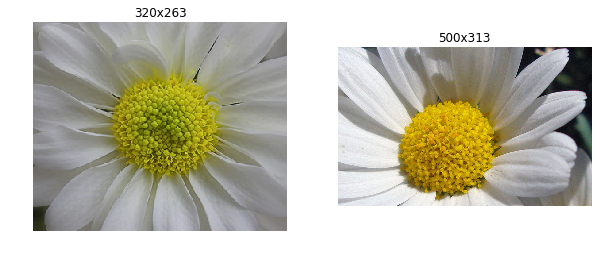

Class: dandelion


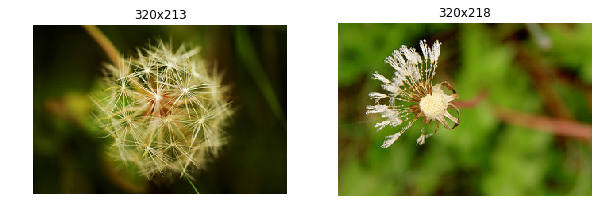

Class: roses


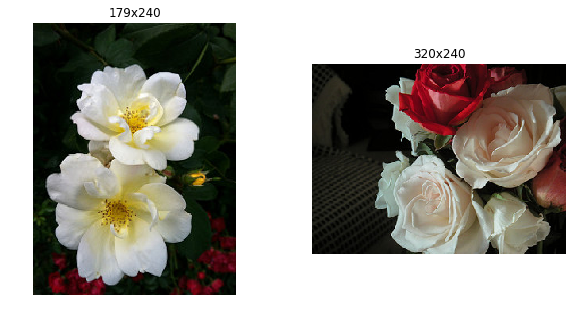

Class: sunflowers


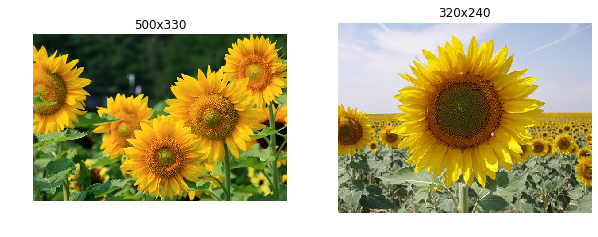

Class: tulips


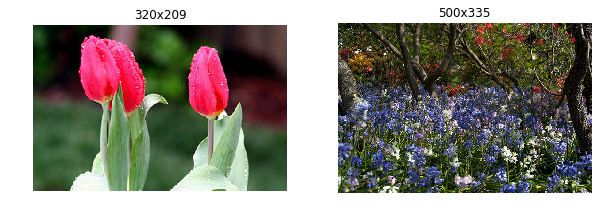

In [ ]:
import matplotlib.image as mpimg

n_examples_per_class = 2

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

In [ ]:
!git clone https://github.com/tensorflow/tensorflow

Cloning into 'tensorflow'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 625351 (delta 14), reused 27 (delta 7), pack-reused 625305
Receiving objects: 100% (625351/625351), 354.76 MiB | 31.76 MiB/s, done.
Resolving deltas: 100% (506281/506281), done.
Checking out files: 100% (17721/17721), done.
